# Cluster Analysis

This exercise sheet covers the following concepts.
- $k$-Means Clustering
- EM-Clustering
- DBSCAN Clustering
- Hiearchical Clustering

## Libraries and Data

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

Last week we explored the boston data, this week we use it for clustering. You will apply both $k$-means clustering and DB clustering to the boston data using all fourteen columns. Functions for all clustering algorithms are available in ```sklearn``` for Python. If you experience problems with the visualizations, ensure that your ```matplotlib``` version is at least 3.0.1 and your ```seaborn``` version is at least 0.9.0. 

There are a couple of problems with clustering data like the boston data, that you will have to solve during this exercise.
- The different features of the data are on different scales, which influences the results. 
- The data has fourteen dimensions. This makes visualizing the clusters difficult. You can try a dimension reduction technique like Principle Component Analysis (PCA) to get only two dimensions or use pair-wise plots. Both have advantages and drawbacks, which you should explore as part of this exercise. 

## $k$-Means Clustering

Use $k$-Means to cluster the data and find a suitable number of clusters for $k$. Use a combination of knowledge you already have about the data, visualizations, as well as the within-sum-of-squares to determine a suitable number of clusters. 

In [56]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np

boston = load_boston()
print(boston['feature_names'])
bpd = pd.DataFrame(boston['data'], columns = boston['feature_names'])
bpd['MEDV'] = boston.target


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [57]:

plt.figure(figsize=(16,9))
plt.rcParams["figure.dpi"] = 150

<Figure size 1152x648 with 0 Axes>

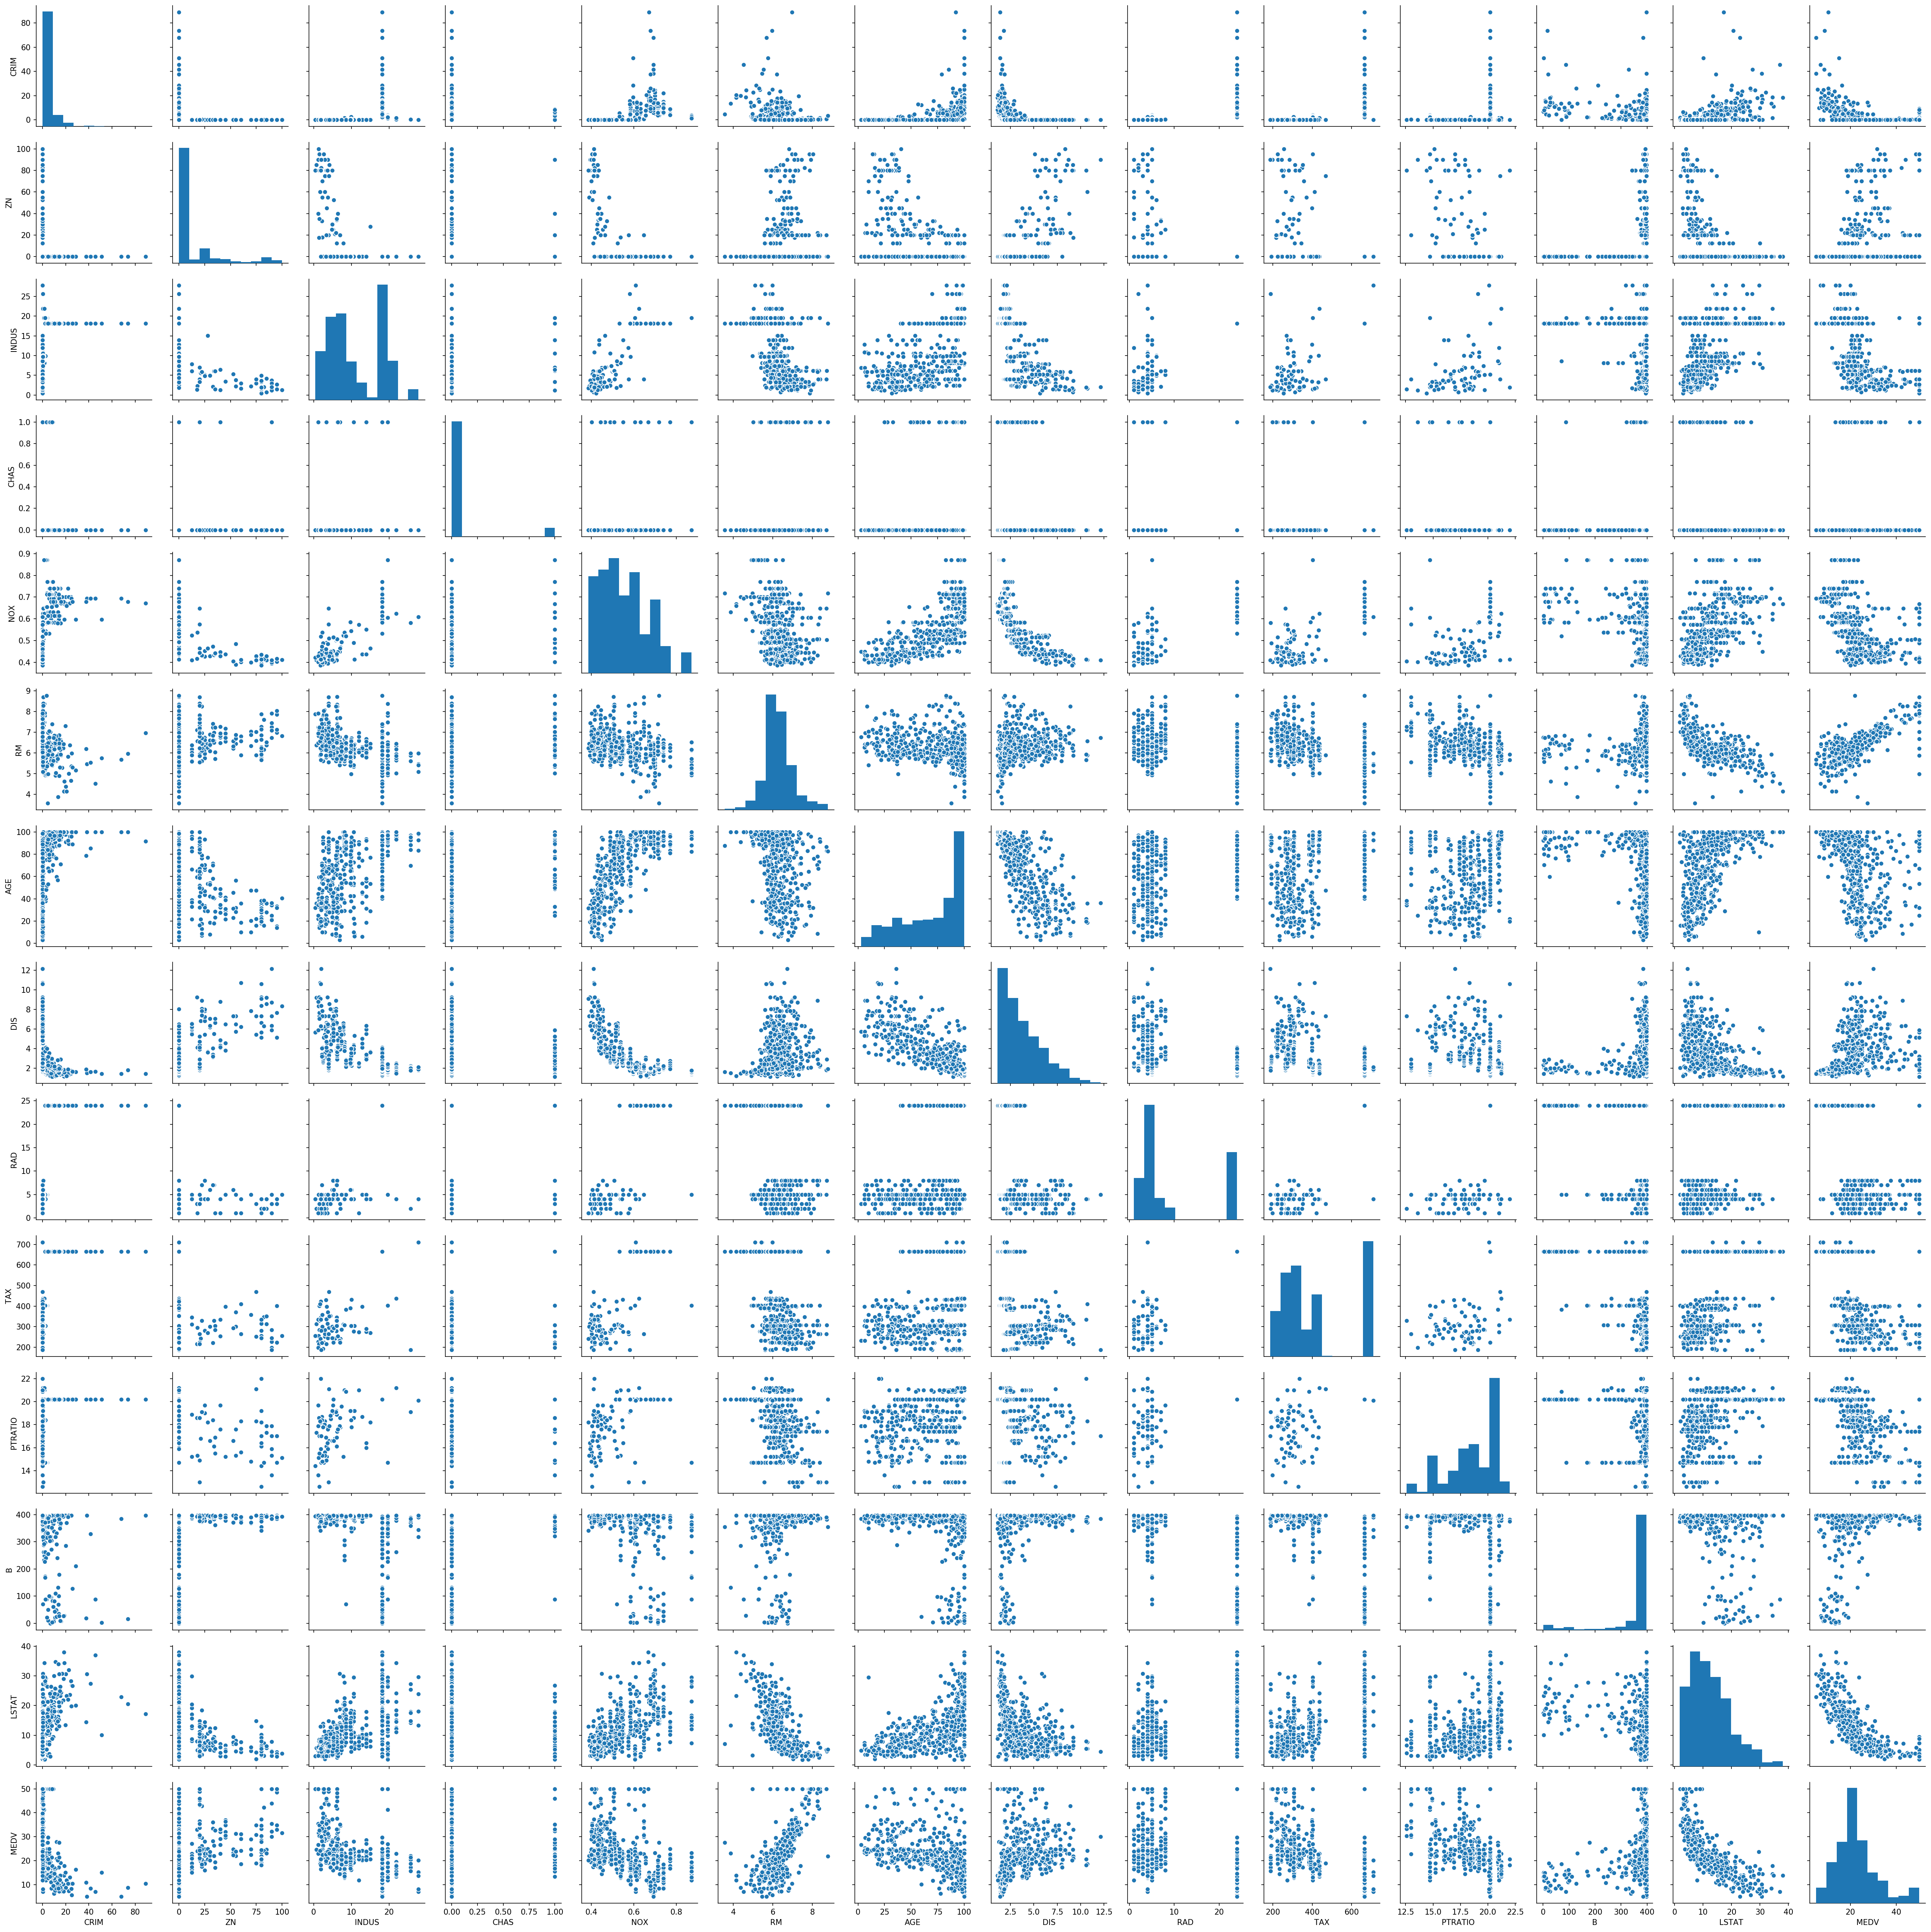

In [61]:
#sns.pairplot(bpd)


In [2]:
#Normalizing
from sklearn.preprocessing import StandardScaler
bpd_norm = (bpd - bpd.mean()) / (bpd.std())
# print(bpd.max() - bpd.min())
# print(bpd_norm.max() - bpd_norm.min())
# print(bpd.median())
# print(bpd_norm.median())
bpd_norm2 = StandardScaler().fit_transform(bpd)
# print(bpd_norm.std())
print(bpd_norm2.std())

1.0


In [3]:
# Without PCA

# # #Visualization
# print(boston['feature_names'])
# sns.scatterplot(x=bpd['MEDV'])
costs = []
centers = []
labels = []
models = []
k = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(bpd_norm2)
    costs.append(kmeans.inertia_)
    centers.append(kmeans.cluster_centers_)
    labels.append(kmeans.labels_)
    models.append(kmeans)
    k.append(i)

In [72]:
#With PCA
#Using PCA so we can actually visualize the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
bpd_pca = pca.fit_transform(bpd_norm2)

costs_pca = []
centers_pca = []
labels_pca = []
models_pca = []
k_pca = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(bpd_pca)
    k_pca.append(i)
    costs_pca.append(kmeans.inertia_)
    centers_pca.append(kmeans.cluster_centers_)
    labels_pca.append(kmeans.labels_)
    models_pca.append(kmeans)


In [69]:
costs_pca,k_pca

([4585.744157046633,
  3879.0778173222466,
  3460.6493525525593,
  3081.4039615265133,
  2758.5540441983767,
  2442.3066686839566,
  2264.9602094572947,
  2084.1854528633517,
  1963.9543242728787],
 [2, 3, 4, 5, 6, 7, 8, 9, 10])

In [6]:

import numpy as np
labels = np.array(labels)
# labels[1+1]

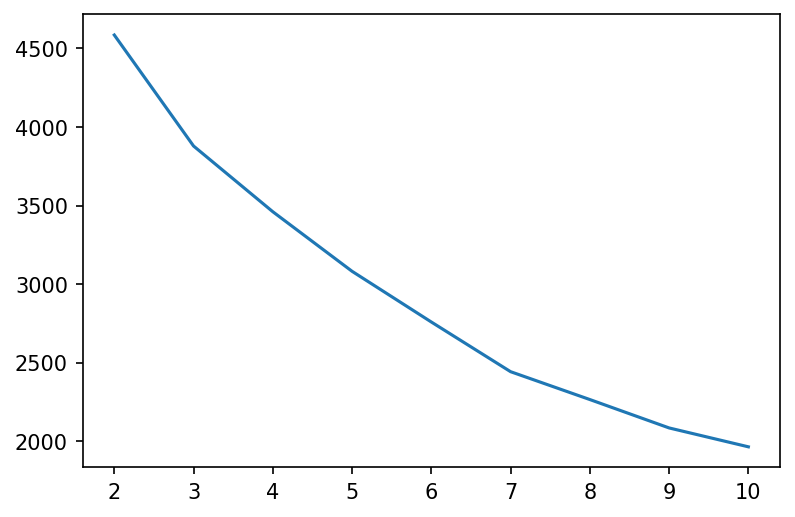

In [70]:
costs_pca

# plt.plot(k,costs)
plt.plot(k_pca,costs_pca)

In [8]:
#Using PCA so we can actually visualize the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
bpd_pca = pca.fit_transform(bpd_norm2)
# sns.distplot(bpd_pca2)
bpd_pca_t = bpd_pca.transpose()
bpd_pca_x= bpd_pca_t[0]
bpd_pca_y= bpd_pca_t[1]
def do_cluster_knn(k,n_init):
    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(bpd_pca)
    cluster_centers = np.array(kmeans.cluster_centers_)
    cluster_centers = cluster_centers.transpose()
    cluster_x, cluster_y = cluster_centers[0], cluster_centers[1]
    plt.scatter(bpd_pca_x, 
                    bpd_pca_y,
                    cmap=plt.cm.Paired,
                    c=kmeans.labels_,
                    alpha=0.3)
    plt.scatter(x=cluster_x,
                y=cluster_y,
                cmap=plt.cm.Paired,
                c=range(1,k+1),
                marker='*',
                edgecolors='black',
                s=100,
                linewidths=1)


In [59]:
from ipywidgets import *
import ipywidgets as widgets
interact(do_cluster_knn, k=IntSlider(min=1, max=20, step=1, value=2),n_init=IntSlider(min=1, max=11, step=1, value=10) )


interactive(children=(IntSlider(value=2, description='k', max=20, min=1), IntSlider(value=10, description='n_i…

<function __main__.do_cluster_knn(k, n_init)>


## EM Clustering


(Note: EM clustering is also known as Gaussian Mixture Models and can be found in the mixture package of ```sklearn```.)

Use the EM algorithm to determine multivariate clusters in the data. Determine a suitable number of clusters using the Bayesian Information Criterion (BIC). 

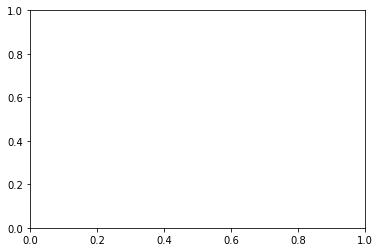

In [10]:
#Using PCA so we can actually visualize the clusters
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
pca = PCA(n_components=2)
bpd_pca = pca.fit_transform(bpd_norm2)
# sns.distplot(bpd_pca2)
bpd_pca_t = bpd_pca.transpose()
bpd_pca_x= bpd_pca_t[0]
bpd_pca_y= bpd_pca_t[1]

ax = plt.gca()

def make_ellipses(gmm, k, ax): # https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
    
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

def do_cluster_em(k,n_init):
    gmm = GaussianMixture(n_components=k, n_init=n_init)
    gmm.fit(bpd_pca)
#     cluster_centers = np.array(kmeans.cluster_centers_)
#     cluster_centers = cluster_centers.transpose()
#     cluster_x, cluster_y = cluster_centers[0], cluster_centers[1]
    pred = gmm.predict(bpd_pca)
    plt.scatter(bpd_pca_x, 
                    bpd_pca_y,
                    cmap=plt.cm.Paired,
                    c=pred,
                    alpha=0.3)
#     plt.scatter(x=cluster_x,
#                 y=cluster_y,
#                 cmap=plt.cm.Paired,
#                 c=range(1,k+1),
#                 marker='*',
#                 edgecolors='black',
#                 s=100,
#                 linewidths=1)


In [73]:
from ipywidgets import *
import ipywidgets as widgets
interact(do_cluster_em , k=IntSlider(min=1, max=20, step=1, value=3),n_init=IntSlider(min=1, max=11, step=1, value=10) )


interactive(children=(IntSlider(value=3, description='k', max=20, min=1), IntSlider(value=10, description='n_i…

<function __main__.do_cluster_em(k, n_init)>

In [12]:

bic_pca = []
models_pca = []
k_pca = []
for i in range(1,11):
    gmm = GaussianMixture(n_components=i, n_init=10)
    gmm.fit(bpd_pca)
    k_pca.append(i)
    bic_pca.append(gmm.bic(bpd_pca))
    
    models_pca.append(gmm)


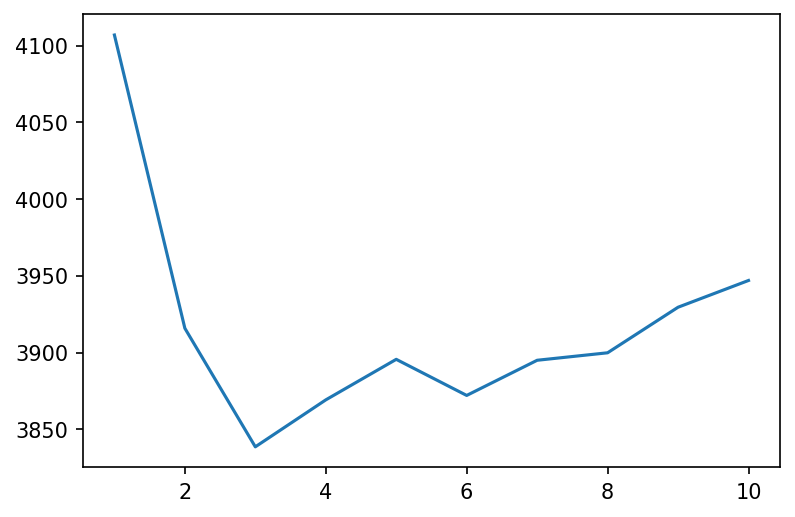

In [74]:

bic_pca
plt.plot(k_pca,bic_pca)

## DBSCAN Clustering

Use DBSCAN to cluster the data and find suitable values for $epsilon$ and $minPts$.  Use a combination of knowledge you already have about the data and visualizations. 

In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics



In [24]:
dbs = DBSCAN(eps=0.3, min_samples=10)
dbs.fit(bpd_pca)



DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [29]:
dbs

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [75]:


def do_cluster_dbs(eps,min_samples):
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(bpd_pca)
#     cluster_centers = np.array(kmeans.cluster_centers_)
#     cluster_centers = cluster_centers.transpose()
#     cluster_x, cluster_y = cluster_centers[0], cluster_centers[1]
    plt.scatter(bpd_pca_x, 
                    bpd_pca_y,
                    cmap=plt.cm.Paired,
                    c=dbs.labels_,
                    alpha=0.3)
#     plt.scatter(x=cluster_x,
#                 y=cluster_y,
#                 cmap=plt.cm.Paired,
#                 c=range(1,k+1),
#                 marker='*',
#                 edgecolors='black',
#                 s=100,
#                 linewidths=1)


In [41]:
interact(do_cluster_dbs , eps=FloatSlider(min=0.01, max=1, step=.001, value=0.01),min_samples=IntSlider(min=1, max=11, step=1, value=1) )


interactive(children=(FloatSlider(value=0.01, description='eps', max=1.0, min=0.01, step=0.001), IntSlider(val…

<function __main__.do_cluster_dbs(eps, min_samples)>

## Hierarchical Clustering

(Note: Hierarchical clustering is also known as agglomerative clustering and can be found under that name in ```sklearn```. This task requires at least ```sklearn``` version 0.22, which is still under development (October 2019). You can find guidance on how to install packages in Jupyter notebook [here](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) and regarding the development version of ```sklearn``` [here](https://scikit-learn.org/stable/developers/advanced_installation.html).)

Use hierarchical clustering with single linkage to determine clusters within the housing data. Find a suitable cut-off for the clusters using a dendrogram. 



In [53]:
from sklearn.cluster import AgglomerativeClustering
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(bpd_pca)
    
    


def do_cluster_hei(n_clusters, linkage):
    heic = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    heic.fit(bpd_pca)
#     cluster_centers = np.array(kmeans.cluster_centers_)
#     cluster_centers = cluster_centers.transpose()
#     cluster_x, cluster_y = cluster_centers[0], cluster_centers[1]
    plt.scatter(bpd_pca_x, 
                    bpd_pca_y,
                    cmap=plt.cm.Paired,
                    c=heic.labels_,
                    alpha=0.3)
#     plt.scatter(x=cluster_x,
#                 y=cluster_y,
#                 cmap=plt.cm.Paired,
#                 c=range(1,k+1),
#                 marker='*',
#                 edgecolors='black',
#                 s=100,
#                 linewidths=1)



In [55]:
interact(do_cluster_hei ,n_clusters=IntSlider(min=1, max=11, step=1, value=1), linkage=Dropdown(description='linkage',options=('ward','average','complete','complete','single')))


interactive(children=(IntSlider(value=1, description='n_clusters', max=11, min=1), Dropdown(description='linka…

<function __main__.do_cluster_hei(n_clusters, linkage)>

## Compare the Clustering Results

How are the clustering results different between the algorithms? Consider, e.g., the number of clusters, the shape of clusters, general problems with using the algorithms, and the insights you get from each algorithm. 

You may also use this to better understand the differences between the algorithms. For example, how are the results from EM clustering different/similar to the results of the $k$-Means clustering? Is there a relationship between the WSS and the BIC? How are the mean values of EM related to the centroids of $k$-Means? What is the relationship between the parameters for DBSCAN and the cut-off for the hierarchical clustering?